In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import load_model, Model
import tensorflow as tf
import keras

class LeNetCNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    C1 = Conv2D(6, (3, 3), padding='same', activation='relu')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)
    C3 = Conv2D(16, (3, 3), padding='same', activation='relu')(S2)
    S4 = MaxPooling2D(pool_size=(2, 2), padding="same")(C3)

    flat = Flatten()(S4)
    # These like ANN
    F5 = Dense(120, activation='relu', use_bias=True)(flat)
    F6 = Dense(84, activation='relu', use_bias=True)(F5)
    output = Dense(10, activation='softmax', use_bias=True)(F6) # y~ output
    self.model = Model(input, output)
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truth
    sgd = keras.optimizers.SGD(learning_rate=0.01)
    adam = keras.optimizers.Adam(learning_rate=0.01)
    self.model.compile(optimizer=sgd, loss = 'categorical_crossentropy', metrics=['accuracy'])
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)



In [2]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Add, AveragePooling2D
from keras.models import load_model, Model
#from keras.objectives import categorical_crossentropy

class DeltaCNN:
  # constructor
  def __init__(self):
    self.model = None

  # Define structure of the CNN
  def build(self, input_dim):
    input = Input(shape = input_dim) # X dau vao cua minh
    
    C1 = Conv2D(8, (3, 3), padding='same', activation='relu')(input)
    S2 = MaxPooling2D(pool_size=(2, 2), padding="same")(C1)

    C3 = Conv2D(8, (3, 3), padding='same', activation='relu')(S2)
    C4 = Conv2D(8, (3, 3), padding='same', activation='relu')(C3)
    C5 = Add()([C4, S2])

    C6= Conv2D(16, (3, 3), strides = (2,2), padding='same', activation='relu')(C5)
    C7 = Conv2D(16, (3, 3), padding='same', activation='relu')(C6)
    C8 = Conv2D(16, (3, 3), padding='same', activation='relu')(C7)
    C9 = Add()([C8, C6])

    P10 = AveragePooling2D()(C9)
    flat = Flatten()(P10)
    F0 = Dense(400, activation='sigmoid', use_bias=True)(flat)
    output = Dense(10, activation='softmax', use_bias=True)(F0)

    self.model = Model(input, output)
    self.model.compile(optimizer="adam", loss = 'categorical_crossentropy', metrics=['accuracy'])
  
  # Train the model
  def train(self, x_train, y_train, x_val, y_val): # x_train chinh la X, y_train chinh la ground-truthewedsdAQ  a QA
    self.model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, batch_size = 128)
  
  # Load model from file
  def load(self, model_file):
    self.model = load_model(model_file)
  
  # save the trained model
  def save(self, model_file):
    self.model.save(model_file)
  
  # Show the architecture of the model
  def summary(self):
    self.model.summary()

  # Test the model with a given input
  def predict(self, x_test):
    return self.model.predict(x_test)

In [3]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
from collections import Counter

In [5]:
counter = Counter(y_train).most_common(3)

In [6]:
counter

[(1, 6742), (7, 6265), (3, 6131)]

In [7]:
import numpy as np

def onehot(y):
  oh = np.zeros((y.shape[0], 10))
  for i in range(y.shape[0]):
    oh[i, int(y[i])]=1
  return oh

In [8]:
import numpy as np
def norm_zero_one(x_train):
  min_val = np.min(x_train)
  max_val = np.max(x_train)
  x_train_norm = (x_train-min_val)/(max_val-min_val)
  return x_train_norm

def norm_normal_dist(x_train):
  mean_val = np.mean(x_train)
  std_val = np.std(x_train)
  x_train_norm = (x_train-mean_val)/std_val
  return x_train_norm

In [9]:
from sklearn import preprocessing
import numpy as np

#enc = preprocessing.OneHotEncoder()

#enc.fit(y_train)

#y_train_oh = enc.transform(y_train).toarray()
#y_train_oh.shape
y_train_oh = onehot(y_train)
y_train_oh.shape

y_test_oh = onehot(y_test)
y_test_oh.shape

x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0

#x_train_norm = x_train_norm[:,:,:, np.newaxis] # Optional: Convert 60000x28x28 -> 60000x28x28x1
#x_test_norm = x_test_norm[:,:,:, np.newaxis] # Optional: Convert 60000x28x28 -> 60000x28x28x1

In [10]:
x_train_norm.shape

(60000, 28, 28)

In [11]:
cnn = DeltaCNN()
cnn.build((28, 28, 1))
cnn.summary()
cnn.train(x_train_norm, y_train_oh, x_test_norm, y_test_oh)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 8)    80          ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 14, 14, 8)    0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 14, 14, 8)    584         ['max_pooling2d[0][0]']          
                                                                                              

In [12]:
cnn.save('bien-chung-lenet.h5')

313/313 [==============================] - 1s 2ms/step


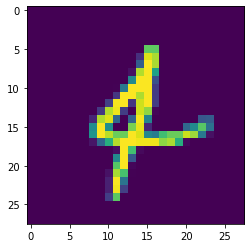

Predicted label:  4
Ground-truth label:  4


In [16]:
import matplotlib.pyplot as plt
new_cnn = DeltaCNN()

new_cnn.load('bien-chung-lenet.h5')
pred = new_cnn.predict(x_test_norm)
index = 300
plt.imshow(x_test[index])
plt.show()
print('Predicted label: ', np.argmax(pred[index]))
print('Ground-truth label: ', y_test[index])

313/313 [==============================] - 1s 2ms/step


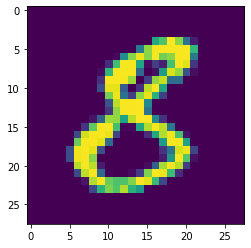

Predicted label:  8
Ground-truth label:  8


In [17]:
pred = cnn.predict(x_test_norm)
test_index = 1234
plt.imshow(x_test[test_index])
plt.show()
print('Predicted label: ', np.argmax(pred[test_index]))
print('Ground-truth label: ', y_test[test_index])

In [18]:
print(pred.shape)
print(y_test.shape)
y_pred = np.array([np.argmax(i) for i in pred])
print(y_pred.shape)

(10000, 10)
(10000,)
(10000,)


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score
import matplotlib.pyplot as plt
def accu(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()
  plt.show()
  # print(cm)
  return accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='macro')

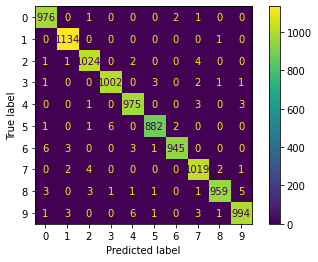

(0.991, 0.9909382770503118)

In [22]:
accu(y_test, y_pred)

In [24]:
# Demo training a CNN model from scratch
cnn = LeNetCNN()
cnn.build((28, 28, 1))
cnn.summary()
cnn.train(x_train_norm, y_train_oh, x_test_norm, y_test_oh)
cnn.save('trained_model.h5')

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 16)        880       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0   

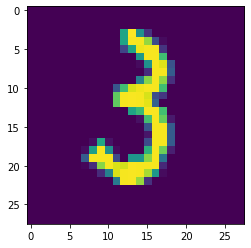

Label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [25]:
import matplotlib.pyplot as plt

# Visualize training data
plt.imshow(x_train[1234])
plt.show()
print('Label: ', y_train_oh[1234])

313/313 [==============================] - 1s 2ms/step


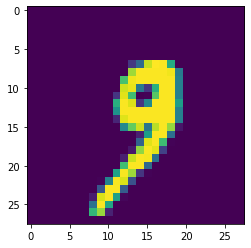

Predicted label:  9
Ground-truth label:  9


In [26]:
# Demo using a pretrained CNN model
cnn = LeNetCNN()
cnn.load('trained_model.h5')

pred = cnn.predict(x_test_norm)
plt.imshow(x_test[1000])
plt.show()
print('Predicted label: ', np.argmax(pred[1000]))
print('Ground-truth label: ', y_test[1000])

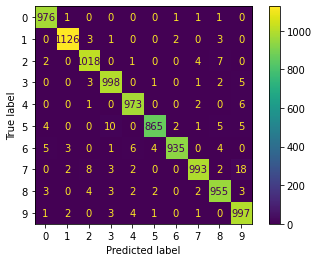

(0.9836, 0.9834768601913358)

In [28]:
y_pred = np.array([np.argmax(i) for i in pred])
accu(y_test, y_pred) 

In [29]:
pred_label = cnn.predict(x_test_norm)

313/313 [==============================] - 1s 2ms/step


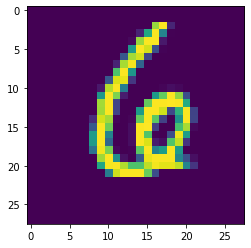

Predicted label:  6
Ground truth label:  6


In [30]:
plt.imshow(x_test[123])
plt.show()
print('Predicted label: ', np.argmax(pred_label[123]))
print('Ground truth label: ', y_test[123])

In [31]:
from keras.datasets import cifar10

cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16